In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [13]:
sber_data['sub_area'].nunique()

146

In [14]:
sber_data['price_doc'].max()

111111112

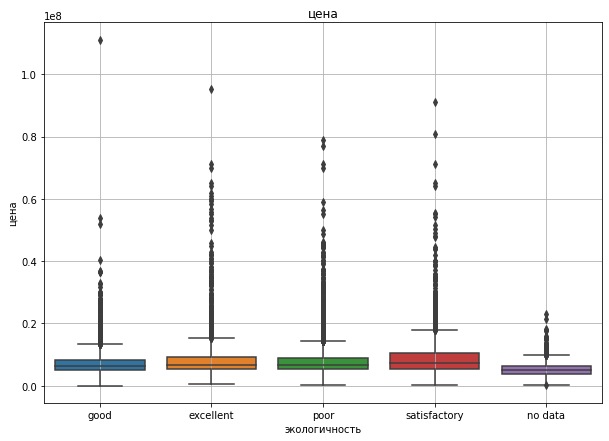

In [15]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=sber_data,
    y='price_doc',
    x='ecology',
    #orient='h',
    #width=0.9
)
boxplot.set_title('цена');
boxplot.set_xlabel('экологичность');
boxplot.set_ylabel('цена');
boxplot.grid()

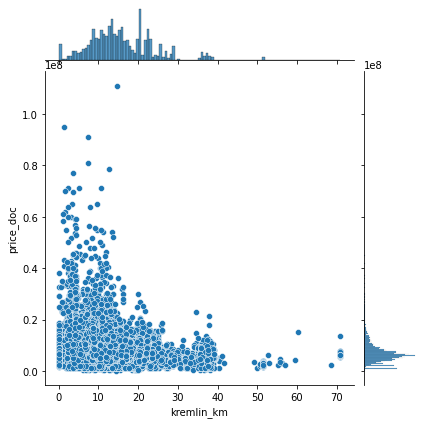

In [16]:
jointplot = sns.jointplot(
    data=sber_data, 
    x='kremlin_km', 
    y='price_doc',
    #hue='country',
    #xlim = (0, 40),
    #ylim = (0, 0.1),
    #height=8,
)

In [34]:
import pandas as pd

def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    """
    Давайте немного модифицируем нашу функцию outliers_iqr(). 
    Добавьте в нее параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5).
    Функция, как и раньше должна возвращать потенциальные выбросы и очищенный DataFrame.
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned


In [18]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [19]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [20]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """
    Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать особенности данных.
    Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) 
    влево и вправо соответственно, которые определяют границы метода z-отклонения. 
    По умолчанию оба параметры равны 3
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [21]:
a, b = outliers_z_score_mod(sber_data, 'mkad_km', left=3, right=3.5, log_scale=True)
display(a)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc


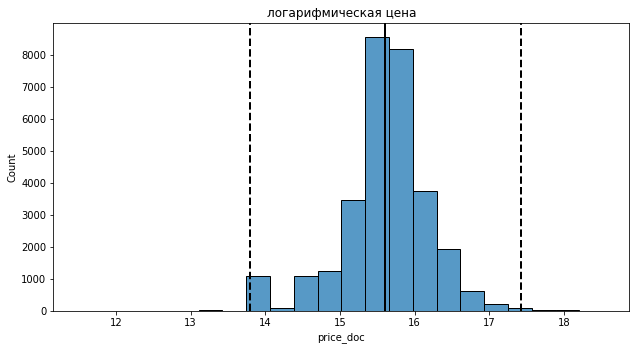

In [31]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
log_price = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price, bins=22, ax=ax)
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.set_title('логарифмическая цена');

In [33]:
a, b = outliers_z_score_mod(sber_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
display(a)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
96,97,30,18.0,1.0,Juzhnoe Tushino,2707.0,3,6340.0,4,0,...,0.973256,0.922550,0.295969,1.310095,1.937922,14.798469,11.894650,satisfactory,0,500000
216,217,60,32.0,16.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,0.471411,0.700815,0.335913,1.419022,0.430986,3.857832,3.837523,satisfactory,1,360000
634,635,70,49.0,16.0,Matushkino,2080.0,3,3885.0,4,0,...,0.516682,4.295348,0.341269,2.219584,1.757142,2.789512,2.370084,no data,0,340000
743,744,37,23.0,4.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,0.280032,1.799739,0.361137,1.387727,1.391221,4.556467,4.541631,poor,0,500000
854,855,80,45.0,13.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.286789,1.669494,0.602358,3.516423,0.730361,8.709119,7.290957,good,0,472249
858,859,78,0.0,2.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.102981,1.951559,0.134515,3.225180,1.662512,8.717367,6.793669,good,0,552312
1149,1150,35,21.0,8.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.165038,0.519850,0.764969,1.259386,0.937291,6.239469,3.667416,poor,0,500000
1167,1168,38,23.0,9.0,Beskudnikovskoe,2757.0,5,7327.0,5,0,...,0.621834,0.612635,0.347734,1.275573,1.273114,9.947039,7.224543,poor,0,190000
1169,1170,47,31.0,7.0,Savelki,1065.0,3,4674.0,3,0,...,0.933860,5.490137,0.378393,1.050189,1.053570,1.899959,3.735541,no data,0,200000
1262,1264,66,36.0,12.0,Mitino,6839.0,9,17063.0,10,0,...,0.610012,0.907285,0.284686,0.562280,0.550989,15.907540,15.005953,good,0,354289


In [35]:
c, d = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True, left=3 , right= 3)
display(c)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
96,97,30,18.0,1.0,Juzhnoe Tushino,2707.0,3,6340.0,4,0,...,0.973256,0.922550,0.295969,1.310095,1.937922,14.798469,11.894650,satisfactory,0,500000
216,217,60,32.0,16.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,0.471411,0.700815,0.335913,1.419022,0.430986,3.857832,3.837523,satisfactory,1,360000
364,365,76,44.0,10.0,Horoshevo-Mnevniki,3397.0,4,11085.0,5,0,...,0.148866,0.040555,0.557836,1.999958,0.533149,9.515257,6.407571,good,0,700000
601,602,37,19.0,9.0,Nekrasovka,2395.0,5,7377.0,5,0,...,5.128497,1.933037,0.275663,3.300318,1.153422,8.478238,7.002608,good,0,779396
634,635,70,49.0,16.0,Matushkino,2080.0,3,3885.0,4,0,...,0.516682,4.295348,0.341269,2.219584,1.757142,2.789512,2.370084,no data,0,340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29061,29064,53,26.0,5.0,Severnoe Butovo,3617.0,6,7653.0,6,0,...,1.766306,0.745646,0.152566,0.387390,0.303318,15.208018,8.095271,good,0,500000
29078,29081,154,108.0,14.0,Horoshevskoe,2354.0,4,6684.0,4,0,...,0.784225,1.202139,0.664344,1.705350,1.695619,5.304904,3.987962,poor,0,50000000
29375,29378,150,79.0,4.0,Kuncevo,4050.0,7,11234.0,8,0,...,1.030319,3.064600,0.761081,1.364967,0.258000,8.508470,8.101507,good,0,52000000
29656,29659,211,162.0,5.0,Presnenskoe,3240.0,7,10602.0,9,0,...,0.214195,0.759790,0.219068,0.392248,0.373612,0.353865,0.734204,excellent,0,70000000


In [36]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений
